# Import the Dependencies

In [82]:
#Install all dependencies using the !pip command 
#Note: idk if !pip will work on mac if not use a diffrent alternative 
!pip install tensorflow opencv-python matplotlib

# Load In The Data Set 

In [32]:
# ========================================================================
#NOTE! Do Not Run This, It will not work since you done have the api key
#==========================================================================

!pip install kaggle


     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 325.1 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 465.5 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 579.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=92204036ae0c1db3fab8adc3c20fb21059182d28aa638059e536a2a6554a1dbb
  Stored in directory: c:\users\tyler\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [46]:

# ========================================================================
#NOTE! Do Not Run This, It will not work since you done have the api key
#==========================================================================


import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.model_list_cli()


Next Page Token = CfDJ8CXYA35d3CRDujxBNSrCTMs8XTlBhiBRiWTeUYGOy8b-YGkeyWobuTzst8HFLHG1wAYN6LoKFvfzuZrBiujF2so
    id  ref                              title                  subtitle                                                                                                                                                                                                              author                  
------  -------------------------------  ---------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  ----------------------  
121027  metaresearch/llama-3.2           Llama 3.2              The Meta Llama 3.2 collection of multilingual large language models (LLMs) is a collection of pretrained and instruction-tuned generative models in 1B and 3B sizes (text in/text out).                               Meta  

In [50]:
# ========================================================================
#NOTE! Do Not Run This, It will not work since you done have the api key
#==========================================================================

!pip install kagglehub

   ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
   --------- ------------------------------ 10.2/42.9 kB ? eta -:--:--
   ---------------------------------------- 42.9/42.9 kB 526.0 kB/s eta 0:00:00


In [52]:
# ========================================================================
#NOTE! Do Not Run This, It will not work since you done have the api key
#==========================================================================


import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanjeetsinghnaik/google-recaptcha")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 392M/392M [00:31<00:00, 12.9MB/s]

Extracting files...


Path to dataset files: C:\Users\Tyler\.cache\kagglehub\datasets\sanjeetsinghnaik\google-recaptcha\versions\1


# Remove All Bad Data 

In [1]:
#Tyler Elvis 
import os 
import tensorflow as tf
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

# check 
cs = os.getcwd()
print(cs)

#log dir
log_dir = 'Logs'

def create_log(image_file_name):
    """
    This function is a helper function that allows the creation of logs 
    
    :param image_file_name: the name of the img being removed
    :return: a file with the image named that was removed in the logs dir
    """
    #create the name you want the file named
    image_name = str(image_file_name + ' Was Removed.txt')
    log_path = os.path.join(log_dir, image_name)
    with open(os.path.join(log_path), 'w') as fp:
        fp.write(image_name + " || Was Removed")


#look for that directory and for that file type 
data_dir = 'data/img'
image_extensions = ['png', 'jpeg', 'jpg']

#look into the data folder
for image in os.listdir(data_dir):
    #look into the folders within the data folder
    for img in os.listdir(data_dir + "/" + image):
        image_currently_looking_at = os.path.join(data_dir, image, img)
        try:
            will_picture_open_incv2 = cv2.imread(image_currently_looking_at)
            is_proper_extension = imghdr.what(image_currently_looking_at)
            #if it fails remove the image from the data-set
            if is_proper_extension not in image_extensions:
                os.remove(image_currently_looking_at)
            #if removed add to the info into the log
                create_log(img)

        except Exception as e:
            print('Something went wrong with opening img in cv2 or wrong extension; Look at Logs Dir'
                  .format(image_currently_looking_at))


C:\Users\Tyler\AppData\Local\Temp\ipykernel_26836\3595900525.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


C:\Users\Tyler\PythonFiles\CNN Captcha Model
Something went wrong with opening img in cv2 or wrong extension; Look at Logs Dir


## Create Random Batches Of Data And Show Them

In [3]:
#Tyler Elvis 
tf.compat.v1.reset_default_graph()
tf.keras.backend.clear_session()

data = tf.keras.utils.image_dataset_from_directory('data/img')
#just goes through each data pt.
iterator_for_data = data.as_numpy_iterator()
#creates a batch of data one batch is 32 random images
batch = iterator_for_data.next()
#creates a fig of subplots and flattens the 2d array into a 1d array of subplots
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (25, 25))
ax = ax.flatten()

less_than_10_images = True
print(batch[1])

#loop to go through the array of images and print them out into an array with labels 
index = 0
for label in batch[1]:
    if index >= 15:
        less_than_10_images = False

    if less_than_10_images == True:
        image_array = batch[0][index]
        ax[index].imshow(image_array.astype(int))
        ax[index].title.set_text(label)
        index += 1
        


Found 34155 files belonging to 2 classes.
[1 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0]


## Scale The Data Down to; Min 0, Max of 1, For Faster Model Time

0.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


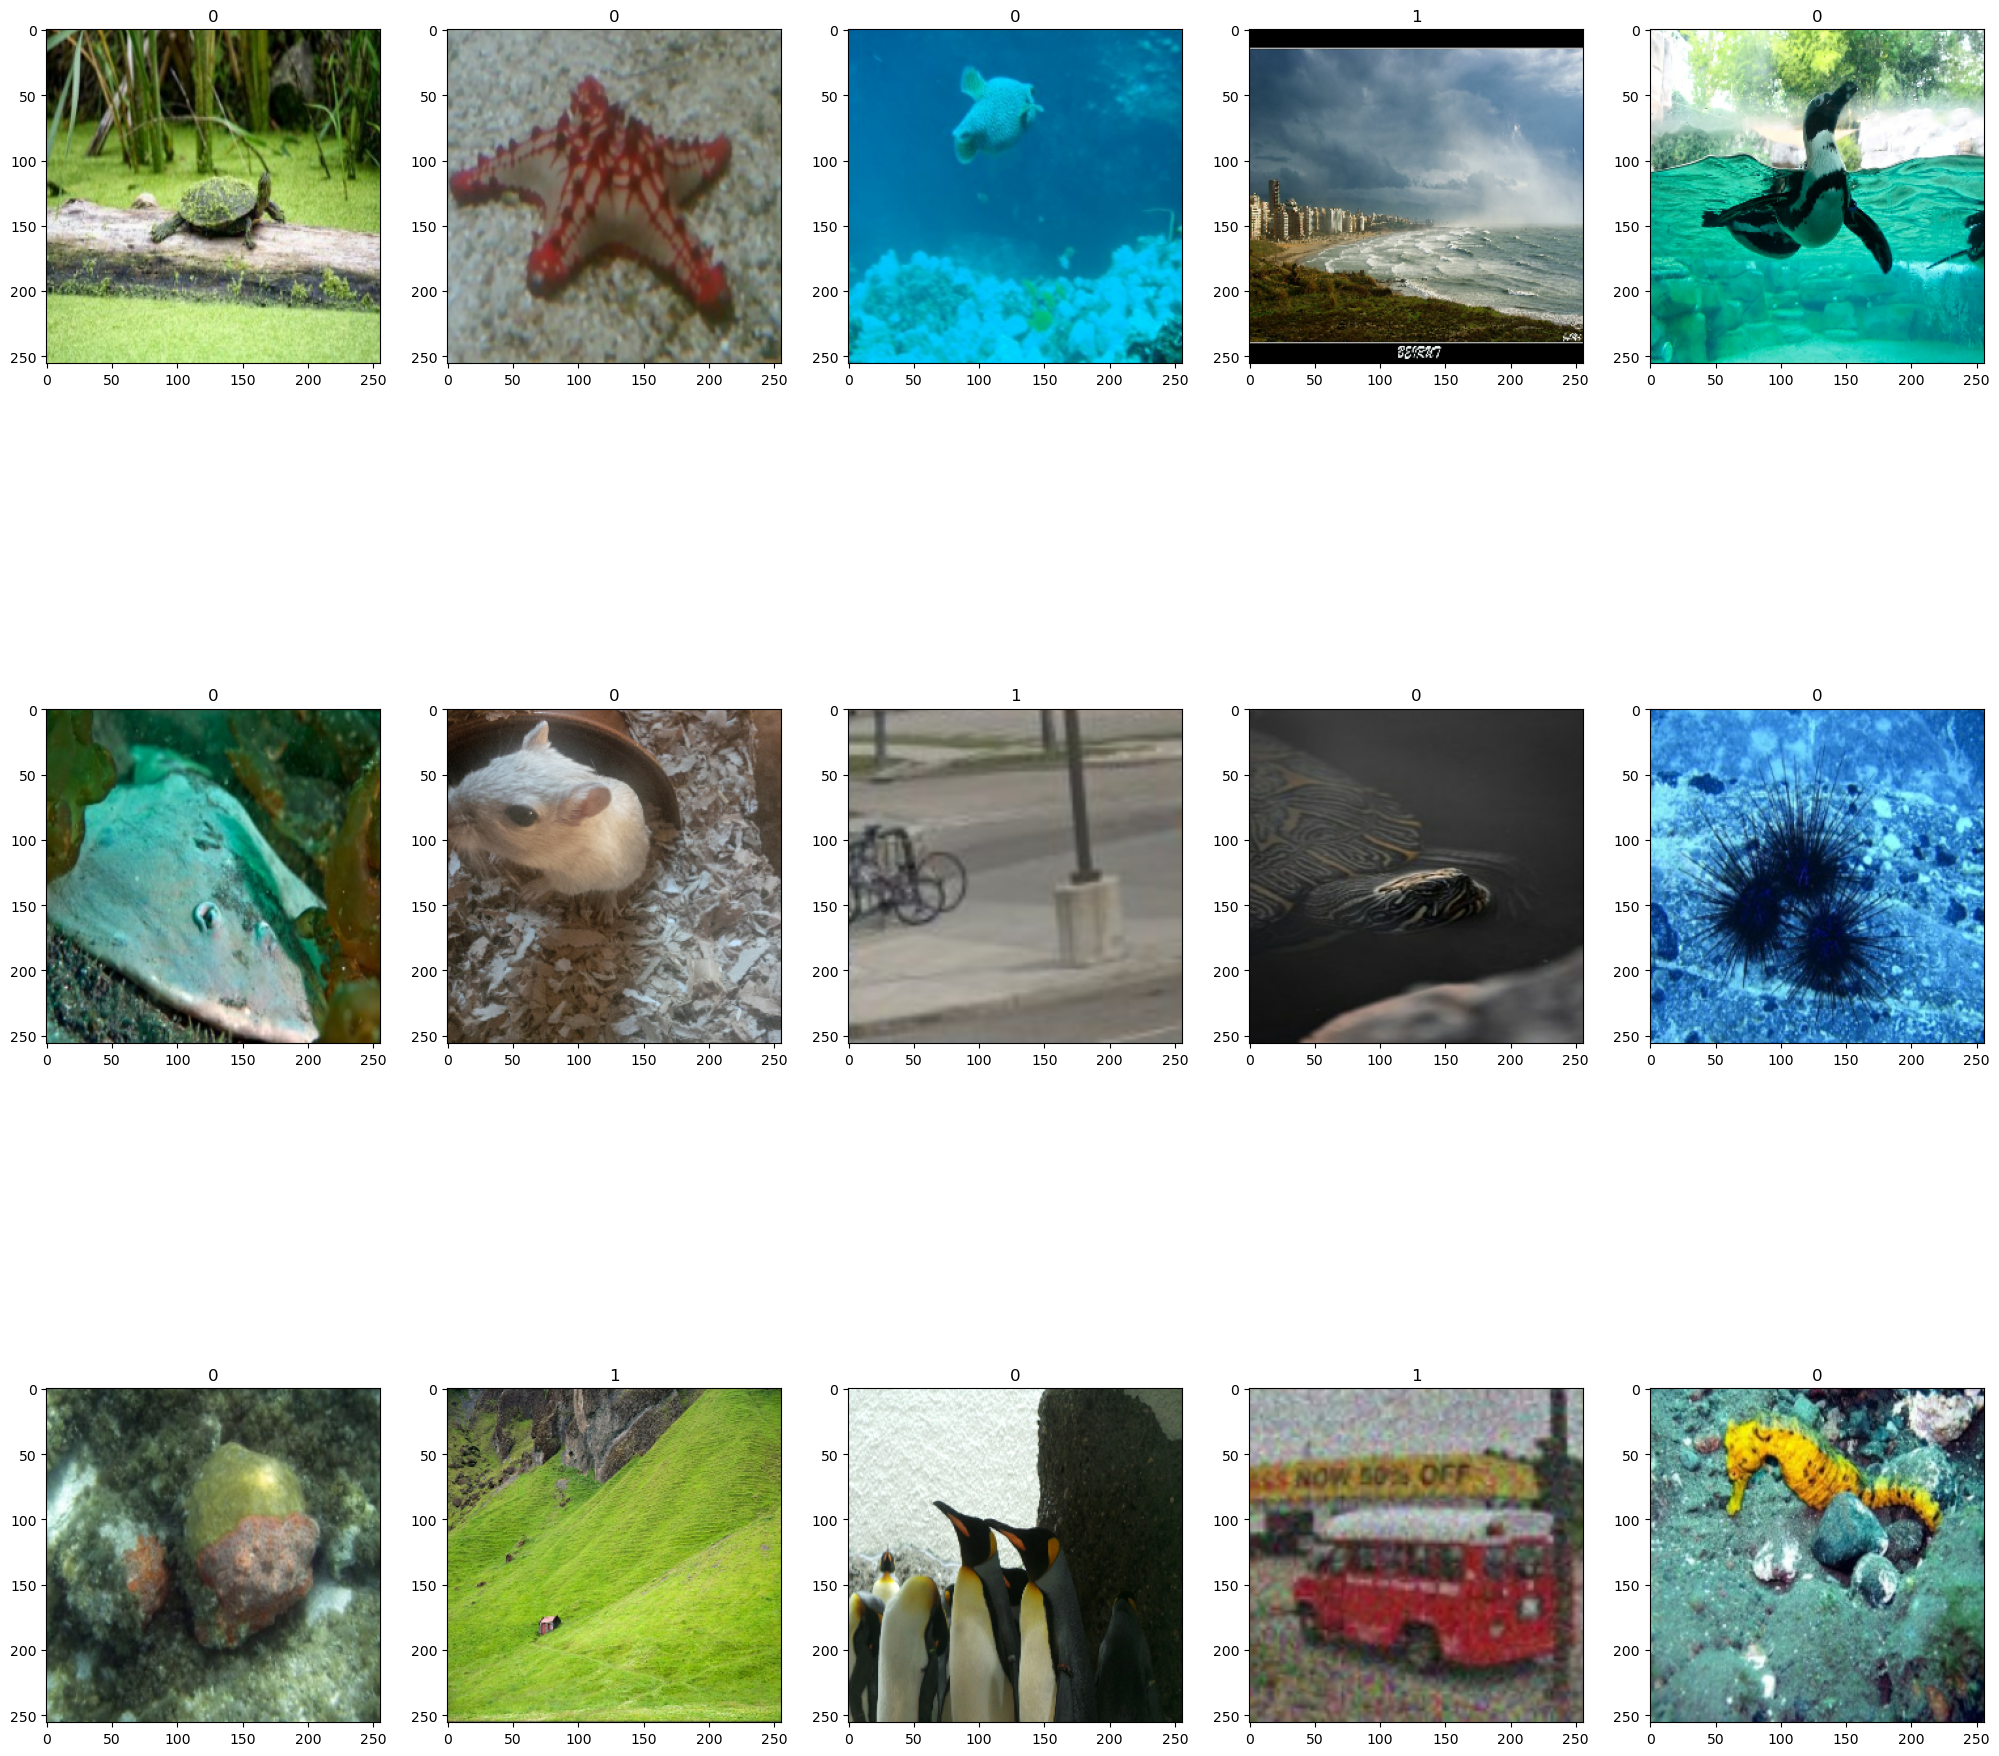

In [17]:
#Tyler Elvis 
#Scale the data down to 0-1 for faster procesing time 
#since each batch makes each image 256 we can dived both sides 
scaled_data = data.map(lambda x,y: (x/255, y))
s = scaled_data.as_numpy_iterator()
#create new batch to use
scaled_batch = s.next()

#check that its working 
print(scaled_batch[0].min())  
print(scaled_batch[0].max())  

#Use the Same code from above to plot 
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (25, 25))
ax = ax.flatten()

index = 0
less_than_10_images = True

for labels in scaled_batch[1]:
    if index >= 15:
        less_than_10_images = False

    if less_than_10_images == True:
        image_arrays = scaled_batch[0][index]
        ax[index].imshow((image_arrays * 256).astype(int))
        ax[index].title.set_text(labels)
        index += 1



## Split Data Into Training, Testing, Val

In [29]:
#test 
print(len(scaled_data))

#splits the batches up into different sizes for training, testing, ect
training_size = int(len(scaled_data) * .7)
Valadation_size = int(len(scaled_data) * .2) + 1
test_size = int(len(scaled_data) * .1) + 1

#test 
training_size+Valadation_size+test_size

1068


1068

In [31]:
#uses TensorFlow take function to take different batches to be split into training and testing and validation 
#.skip() skips the batches that have already been taken 

train = scaled_data.take(training_size)
val = scaled_data.skip(training_size).take(Valadation_size)
test = scaled_data.skip(training_size + Valadation_size).take(test_size)

## Build The Model

In [39]:
# Mari Modebadze 
# The model uses the Adam optimizer and sparse categorical crossentropy loss
# The Flatten layer flattens the 2D output from the convolutional layers into a 1D vector 
# The network starts with Conv2D layers with ReLU activation, followed by MaxPooling2D layers to down-sample the feature maps

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

# Adding layers 
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Assuming there are 10 classes

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,397,802 (28.22 MB)

 Trainable params: 7,397,802 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

## Train The Model

In [41]:
# Mari Modebadze 
# Training loop, includes TensorBoard callbacks and model fitting.

from tensorflow.keras.callbacks import TensorBoard

# Set up the TensorBoard callback
log_dir = "Logs"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
history = model.fit(
    train, 
    epochs=15, 
    validation_data=val, 
    callbacks=[tensorboard_callback]
)

Epoch 1/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 334s 438ms/step - accuracy: 0.8279 - loss: 0.4232 - val_accuracy: 0.9553 - val_loss: 0.1432
Epoch 2/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 324s 434ms/step - accuracy: 0.9531 - loss: 0.1327 - val_accuracy: 0.9562 - val_loss: 0.1197
Epoch 3/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 312s 417ms/step - accuracy: 0.9667 - loss: 0.0949 - val_accuracy: 0.9629 - val_loss: 0.0994
Epoch 4/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 309s 413ms/step - accuracy: 0.9754 - loss: 0.0696 - val_accuracy: 0.9559 - val_loss: 0.1302
Epoch 5/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 307s 410ms/step - accuracy: 0.9803 - loss: 0.0557 - val_accuracy: 0.9671 - val_loss: 0.1021
Epoch 6/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 306s 409ms/step - accuracy: 0.9868 - loss: 0.0402 - val_accuracy: 0.9686 - val_loss: 0.1026
Epoch 7/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 308s 412ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9603 - val_loss: 0.1770
Epoch 8/15
747/747 ━━━━━━━━━━━━━━━━━━━━ 312s 416ms/step - accuracy: 0.9917 -

## Save The Model

In [47]:
model.save('my_model.keras')

## Plot The Performance 

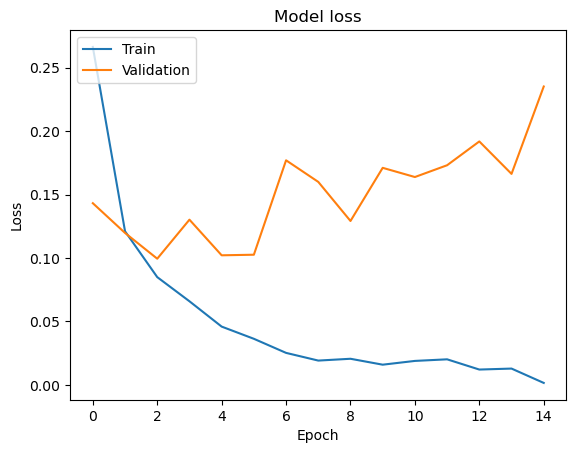

In [43]:
# Mari Modebadze 
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluate The Model By Getting Random Picture From Google Images 

In [1]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the image
image_path = 'demo_sample.jpg'  # Replace with your image path
image = load_img(image_path, target_size=(256, 256))

# Preprocess the image
image_array = img_to_array(image) / 255.0  # Normalize pixel values
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension: shape becomes (1, 256, 256, 3)

# Load the trained model
restored_model = load_model('my_model.keras')

# Make a prediction
predictions = restored_model.predict(image_array)
predicted_class = np.argmax(predictions, axis=-1)[0]  # Get the class with the highest probability

class_labels = {0: 'Animal', 1: 'Non-Animal'}
predicted_label = class_labels.get(predicted_class, "Unknown")
print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Predicted label: Animal
